In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021120443.html')
#A

In [3]:
# choosing the data that we will use 
A1=A[11]
#A1

In [4]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[365:514] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header
A2 = A2.reset_index(drop=True) #reseting index
A2

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,31 Jan 2020,39647,38860,39151,39063,1288760,0.00,0.00,3.24,9.05,11.05,3.24
1,30 Jan 2020,39212,38335,38790,39177,892468,0.00,0.00,3.23,9.03,11.08,3.23
2,29 Jan 2020,39490,38980,38980,39054,946550,0.00,0.00,3.24,9.06,11.04,3.24
3,28 Jan 2020,39480,38386,38648,38946,853612,0.00,0.00,3.25,9.08,11.01,3.25
4,27 Jan 2020,39800,38186,39800,38888,1766087,0.00,0.00,3.25,9.09,11.00,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
144,05 Jul 2019,38259,37763,38259,37880,1406832,0.00,0.00,2.89,7.14,14.01,2.89
145,04 Jul 2019,39209,38352,39153,38684,1054125,0.00,0.00,2.83,6.99,14.31,2.83
146,03 Jul 2019,40179,39107,40179,39175,1208522,0.00,0.00,2.80,6.90,14.49,2.80
147,02 Jul 2019,40925,40134,40535,40134,1179678,0.00,0.00,2.73,6.74,14.85,2.73


In [5]:
Indicator = A2.copy() #make a copy of the original dataset
#Indicator

In [6]:
Indicator['Date'] = pd.to_datetime(Indicator.Date) #changing date format
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,2020-01-31,39647,38860,39151,39063,1288760,0.00,0.00,3.24,9.05,11.05,3.24
1,2020-01-30,39212,38335,38790,39177,892468,0.00,0.00,3.23,9.03,11.08,3.23
2,2020-01-29,39490,38980,38980,39054,946550,0.00,0.00,3.24,9.06,11.04,3.24
3,2020-01-28,39480,38386,38648,38946,853612,0.00,0.00,3.25,9.08,11.01,3.25
4,2020-01-27,39800,38186,39800,38888,1766087,0.00,0.00,3.25,9.09,11.00,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,38259,37763,38259,37880,1406832,0.00,0.00,2.89,7.14,14.01,2.89
145,2019-07-04,39209,38352,39153,38684,1054125,0.00,0.00,2.83,6.99,14.31,2.83
146,2019-07-03,40179,39107,40179,39175,1208522,0.00,0.00,2.80,6.90,14.49,2.80
147,2019-07-02,40925,40134,40535,40134,1179678,0.00,0.00,2.73,6.74,14.85,2.73


In [7]:
#making all digits to be float for calculation
Indicator['High']=Indicator.High.astype('float')
Indicator['Close']=Indicator.Close.astype('float')
Indicator['Low']=Indicator.Low.astype('float')
Indicator['Open']=Indicator.Open.astype('float')

In [8]:
#deleting columns not neccessary fot indicator calculation
del Indicator['Volume'],Indicator['TotalDistributionYield'], Indicator['InterestYield'], Indicator['CapitalPaymentYield'], Indicator['EY'], Indicator['DY'], Indicator['P/E']
#Indicator

In [9]:
#descriptive statistics
Indicator["Close"].describe()

count      149.000000
mean     37191.161074
std       2959.002199
min      31100.000000
25%      34578.000000
50%      38085.000000
75%      39466.000000
max      42529.000000
Name: Close, dtype: float64

In [10]:
def RSI(value):
    '''
    The function calculates the relative strength index parameters 
    to be used to calculate 14_day rsi values
    '''
    up = value[value>0].mean()
    down = -value[value<0].mean()
    return (100 * up / (up + down))

Indicator['Direction'] = (Indicator['Close'] - Indicator['Close'].shift(1)) #adding momentum
Indicator['RSI_14D'] = Indicator['Direction'].rolling(center=False, window=14).apply(RSI) #14D RSI

In [11]:
l = []
for i in range (len(Indicator)):
    if Indicator['RSI_14D'][i] >= 28 and Indicator['RSI_14D'][i] <= 30: #values in this range satisfy a buy condition
        l.append(1) #buy
    elif Indicator['RSI_14D'][i] >= 31 and Indicator['RSI_14D'][i] <= 69: #values in this range satisfy a hold condition
        l.append(2) #hold
    elif Indicator['RSI_14D'][i] >= 70:#values in this range satisfy a sell condition
        l.append(3)#sell
    else:
        l.append(2) #hold signal
Indicator['RSI_sig'] = l

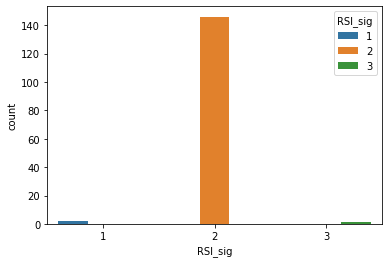

2    146
1      2
3      1
Name: RSI_sig, dtype: int64

In [12]:
sns.countplot(x = 'RSI_sig', data=pd.DataFrame(Indicator), hue='RSI_sig') #plotting signal frequency
plt.savefig("anglo_rsicount")
plt.show()
Indicator['RSI_sig'].value_counts() #counts according to signal  

ValueError: x and y must have same first dimension, but have shapes (149,) and (2,)

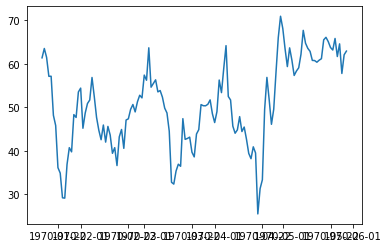

In [19]:
# graphical representation of the RSI data
r = Indicator['RSI_14D']
h = [0,160]
b = [30,30]
f = plt.plot(r, label = 'RSI_14D')
e = [70,70]
g = plt.plot(h,b,h,e) + f
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("anglo_rsi")
plt.show(g)

In [15]:
n=21
Indicator['STOK'] = ((Indicator['Close'] - Indicator['Low'].rolling(window=n,center=False).mean()) /
                     (Indicator['High'].rolling(window=n, center=False).max() - 
                      Indicator['Low'].rolling(window=n, center=False).min())) * 100 #calculation of the %D stochastic
Indicator['STOD'] = Indicator['STOK'].rolling(window = 7, center=False).mean()  #%K stochastic 

In [16]:
m = []
for i in range (len(Indicator)):
    if Indicator['STOK'][i] >= 28 and Indicator['STOK'][i]<=30:#values in this range satisfy a buy condition
        m.append(1) #buy
    elif Indicator['STOK'][i] > 30 and Indicator['STOK'][i] < 70:#values in this range satisfy a hold condition
        m.append(2) #sell    
    elif Indicator['STOK'][i] >= 70:#values in this range satisfy a sell condition
        m.append(3) #sell
    else:
        m.append(2) #hold
Indicator['STO_sig'] = m

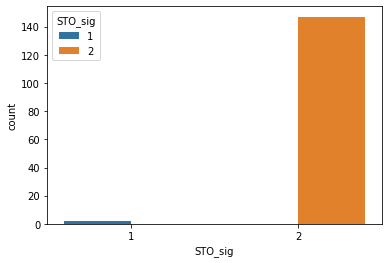

2    147
1      2
Name: STO_sig, dtype: int64

In [17]:
sns.countplot(x = 'STO_sig', data=pd.DataFrame(Indicator), hue='STO_sig') #plotting signal frequency
plt.savefig("anglo_stocount")
plt.show()
Indicator['STO_sig'].value_counts() #give the exact number of frequency per signal

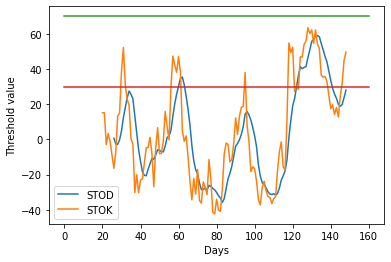

In [18]:
#graphical presentation of Stochastic 
t = Indicator['STOD']
j = Indicator['STOK']
u = plt.plot(t, label = 'STOD')
s = plt.plot(j, label = 'STOK')
h = [0,160]
b = [30,30]
e = [70,70]
g = plt.plot(h,e,h,b) + u + s
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("anglo_sto")
plt.show()

In [19]:
Indicator['EMA_10'] = Indicator['Close'].ewm(span=10,adjust=False,min_periods=1).mean() #10day exponential ma
Indicator['EMA_30'] = Indicator['Close'].ewm(span=20,adjust=False,min_periods=1).mean() #30day exponential ma
Indicator['EMA_90'] = Indicator['Close'].ewm(span=90,adjust=False,min_periods=1).mean() #90day exponential ma

In [20]:
# append 1 for a buy, 3for a sell and 2 for hold and NaN
n = []
for i in range (len(Indicator)):
    if Indicator['EMA_10'][i] < (Indicator['EMA_30'][i] and Indicator['EMA_90'][i]):#values in this range satisfy a buy condition
        n.append(1) #buy
    elif Indicator['EMA_10'][i] > (Indicator['EMA_30'][i] and Indicator['EMA_90'][i]):#values in this range satisfy a hold condition
        n.append(3) #sell
    elif Indicator['EMA_10'][i] == Indicator['EMA_30'][i] == Indicator['EMA_90'][i]:#values in this range satisfy a sell condition
        n.append(2)  #hold      
    else:
        n.append(2)#hold
Indicator['EMA_sig'] = n     

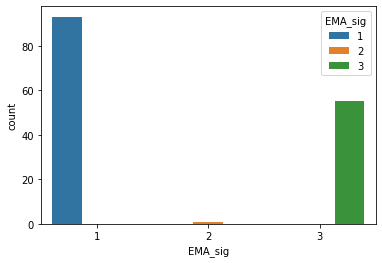

1    93
3    55
2     1
Name: EMA_sig, dtype: int64

In [21]:
sns.countplot(x = 'EMA_sig', data=pd.DataFrame(Indicator), hue='EMA_sig')#plots frequency per signal generated
plt.savefig("anglo_emacount")
plt.show()
Indicator['EMA_sig'].value_counts()#counts according to signal

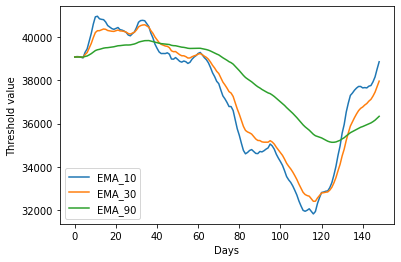

In [22]:
# buy if 10EMA line cuts the other two EMA lines from above and moves below both the EMAs
# sell if 10EMA line cuts the other two EMA lines from below and moves above both the EMAs
a = Indicator['EMA_10'] #10 day exponential moving average
b = Indicator['EMA_30'] #30 day exponential moving average
c = Indicator['EMA_90'] #90 day exponential moving average
d = plt.plot(a, label = 'EMA_10' ) + plt.plot(b, label = 'EMA_30') + plt.plot(c, label = 'EMA_90')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("anglo_ema")
plt.show(d)

In [23]:
Indicator['26_ema'] = Indicator['Close'].ewm(span=26,adjust=True,ignore_na=False).mean() #26day ema
Indicator['12_ema'] = Indicator['Close'].ewm(span=12,adjust=True,ignore_na=False).mean() #12day ema
Indicator['MACD'] = Indicator['12_ema'] - Indicator['26_ema'] #macd
Indicator['9EMA_MACD'] = Indicator['MACD'].ewm(span=9,adjust=True,ignore_na=False).mean() #9daymacd_ema
#Indicator

In [24]:
f = []
for i in range (len(Indicator)):
    if Indicator['MACD'][i] > Indicator['9EMA_MACD'][i]:#values in this range satisfy a buy condition
        f.append(1) #buy
    elif Indicator['MACD'][i] < Indicator['9EMA_MACD'][i]:#values in this range satisfy a hold condition
        f.append(3) #sell  
    elif Indicator['MACD'][i] == Indicator['9EMA_MACD'][i]:#values in this range satisfy a sell condition
        f.append(2) #sell
    else:
        f.append(2) #hold
Indicator['MACD_sig'] = f 

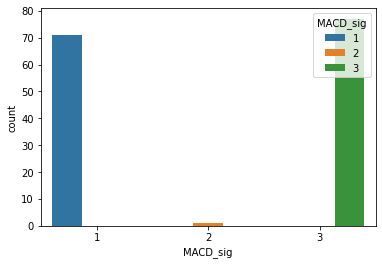

3    77
1    71
2     1
Name: MACD_sig, dtype: int64

In [25]:
sns.countplot(x = 'MACD_sig', data=pd.DataFrame(Indicator), hue='MACD_sig')#plots frequency of signals
plt.savefig("anglo_macdcount")
plt.show()
Indicator['MACD_sig'].value_counts()#counts according to signal

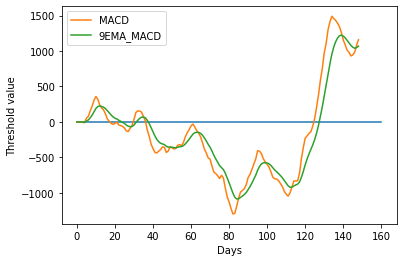

In [26]:
#graphical representation of MACD
q = Indicator['9EMA_MACD']
e = Indicator['MACD']
z = [0,160]
x = [0,0]
r = plt.plot(z,x)+ plt.plot(e, label = 'MACD') +plt.plot(q, label = '9EMA_MACD')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("anglo_macd")
plt.show(r)

In [27]:
#changing columns to arrays for easy adding as to generate business decision
new1 = Indicator['RSI_sig'].to_numpy()
new2 = Indicator['MACD_sig'].to_numpy()
new3 = Indicator['EMA_sig'].to_numpy()
new4 = Indicator['STO_sig'].to_numpy()

In [28]:
b = []
for i in range (len(new2)):
    if new1[i] + new2[i] + new3[i] + new4[i] <= 6: #buy if this condition is met
        b.append(1)
    elif new1[i] + new2[i] + new3[i] + new4[i] >=10:#sell if this condition is met
        b.append(3)
    else:
        b.append(2)#hold
new5 = pd.Series(b)  
#new5

In [29]:
Indicator['Decision'] = new5
Indicator

,Date,High,Low,Open,Close,Direction,RSI_14D,RSI_sig,STOK,STOD,...,EMA_10,EMA_30,EMA_90,EMA_sig,26_ema,12_ema,MACD,9EMA_MACD,MACD_sig,Decision
0,2020-01-31,39647.0,38860.0,39151.0,39063.0,NaN,NaN,2,NaN,NaN,...,39063.000000,39063.000000,39063.000000,2,39063.000000,39063.000000,0.000000,0.000000,2,2
1,2020-01-30,39212.0,38335.0,38790.0,39177.0,114.0,NaN,2,NaN,NaN,...,39083.727273,39073.857143,39065.505495,3,39122.192308,39124.750000,2.557692,1.420940,1,2
2,2020-01-29,39490.0,38980.0,38980.0,39054.0,-123.0,NaN,2,NaN,NaN,...,39078.322314,39071.965986,39065.252626,3,39097.691474,39097.136259,-0.555215,0.611041,3,3
3,2020-01-28,39480.0,38386.0,38648.0,38946.0,-108.0,NaN,2,NaN,NaN,...,39054.263711,39059.969226,39062.631690,1,39055.285166,39049.428448,-5.856718,-1.579935,3,2
4,2020-01-27,39800.0,38186.0,39800.0,38888.0,-58.0,NaN,2,NaN,NaN,...,39024.033946,39043.591204,39058.793631,1,39016.491046,39005.568916,-10.922131,-4.359027,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,38259.0,37763.0,38259.0,37880.0,-205.0,61.687642,2,12.772650,20.038395,...,37751.344234,37114.790683,36031.023569,3,36724.550830,37655.328538,930.777707,1080.294041,3,3
145,2019-07-04,39209.0,38352.0,39153.0,38684.0,804.0,64.598080,2,24.476139,18.827747,...,37920.918009,37264.239189,36089.330743,3,36869.697127,37813.585686,943.888558,1053.012945,3,3
146,2019-07-03,40179.0,39107.0,40179.0,39175.0,491.0,57.796786,2,31.943650,19.798731,...,38148.932917,37446.216409,36157.147650,3,37040.462388,38023.034042,982.571654,1038.924686,3,3
147,2019-07-02,40925.0,40134.0,40535.0,40134.0,959.0,62.089391,2,44.970775,23.727682,...,38509.854205,37702.195799,36244.550998,3,37269.615913,38347.798035,1078.182122,1046.776174,1,2


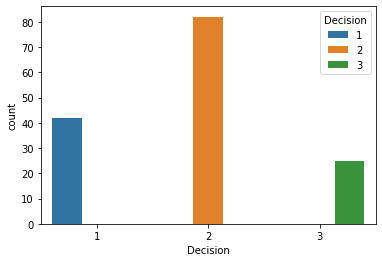

2    82
1    42
3    25
Name: Decision, dtype: int64

In [30]:
sns.countplot(x = 'Decision', data=pd.DataFrame(Indicator), hue='Decision') #plots frequency of the decision
plt.savefig("anglo_decision")
plt.show()
Indicator['Decision'].value_counts() #counts according to signal

In [32]:
Indicator['Decision'].value_counts(normalize=True) * 100 #calcutates frequency of signal as a percentage

2    55.033557
1    28.187919
3    16.778523
Name: Decision, dtype: float64